## Various Examples of Taking Historical VaR

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import quandl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
quandl.ApiConfig.api_key = "vtreWrvk7v_uQiCNFaEH"
portfolio = quandl.get(["WIKI/AAPL", "WIKI/GE", "WIKI/GOOGL", "WIKI/JNJ"],\
                       start_date="2015-03-12", end_date="2016-03-12",\
                       transformation="rdiff")

In [5]:
portfolio.head()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/JNJ - Low,WIKI/JNJ - Close,WIKI/JNJ - Volume,WIKI/JNJ - Ex-Dividend,WIKI/JNJ - Split Ratio,WIKI/JNJ - Adj. Open,WIKI/JNJ - Adj. High,WIKI/JNJ - Adj. Low,WIKI/JNJ - Adj. Close,WIKI/JNJ - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-13,0.017088,0.003964,0.007811,-0.006910,0.071637,NaN,0.0,0.017088,0.003964,0.007811,...,-0.001930,-0.006211,-0.059654,NaN,0.0,0.008994,-0.001895,-0.001930,-0.006211,-0.059654
2015-03-16,-0.004180,-0.003550,0.002366,0.011004,-0.307811,NaN,0.0,-0.004180,-0.003550,0.002366,...,0.011159,0.018647,-0.012184,NaN,0.0,-0.001102,0.010195,0.011159,0.018647,-0.012184
2015-03-17,0.016306,0.018968,0.022626,0.016727,0.422275,NaN,0.0,0.016306,0.018968,0.022626,...,-0.003309,-0.011577,-0.055001,NaN,0.0,0.003710,-0.005442,-0.003309,-0.011577,-0.055001
2015-03-18,0.008737,0.014452,0.005730,0.011256,0.279243,NaN,0.0,0.008737,0.014452,0.005730,...,-0.002817,0.015717,0.091848,NaN,0.0,-0.002198,0.012137,-0.002817,0.015717,0.091848
2015-03-19,0.013780,0.000659,0.008151,-0.007589,-0.298164,NaN,0.0,0.013780,0.000659,0.008151,...,0.017956,0.002267,-0.139118,NaN,0.0,0.011513,0.002113,0.017956,0.002267,-0.139118


In [6]:
#We only want Adjusted Close
#If someone knows a better way to do this please email me
port_close = portfolio[list(portfolio.columns[portfolio.columns.str.\
                                              contains('Adj. Close')])]
port_close = port_close.rename(columns={"WIKI/AAPL - Adj. Close":"AAPL",\
                                       "WIKI/GE - Adj. Close":"GE",\
                                       "WIKI/GOOGL - Adj. Close":"GOOGL",\
                                       "WIKI/JNJ - Adj. Close":"JNJ"})
port_close


,AAPL,GE,GOOGL,JNJ
Date,,,,
2015-03-13,-0.006910,-0.014173,-0.014559,-0.006211
2015-03-16,0.011004,0.016374,0.015624,0.018647
2015-03-17,0.016727,-0.005501,-0.007175,-0.011577
2015-03-18,0.011256,0.013038,0.015333,0.015717
2015-03-19,-0.007589,-0.012090,-0.004398,0.002267
...,...,...,...,...
2016-03-07,-0.011067,-0.005581,-0.023856,0.002254
2016-03-08,-0.008246,-0.007593,0.001024,-0.004872
2016-03-09,0.000891,-0.000333,0.016650,0.005837


In [7]:
#confirm number of trading days
print(len(port_close))

252


In [8]:
#Convert returns into P/L
weights = [0.2, 0.3, 0.1, 0.4]
returns = (weights * port_close.values).sum(axis=1)
returns #array representing daily P&Ls


array([-9.57415965e-03,  1.61342784e-02, -3.65341038e-03,  1.39830022e-02,
       -4.67805290e-03,  1.34688243e-03,  5.24775620e-03, -4.98262010e-03,
       -1.76796110e-02, -1.32058387e-03, -1.14947852e-03,  1.36670421e-02,
       -1.16613601e-02, -6.63121634e-03,  3.41821318e-03,  4.68740376e-03,
       -5.15650722e-05,  1.99577030e-04,  1.46883257e-02,  3.62434360e-02,
       -1.55531570e-02, -1.51563553e-03, -1.60915611e-03, -5.69109310e-03,
       -5.40597870e-03,  6.78074388e-03, -5.45816342e-03,  7.63357998e-03,
        2.59100881e-03,  5.75687297e-03,  1.24084168e-03, -1.45390549e-04,
       -5.19077338e-03, -1.25262367e-02,  1.28062381e-02,  3.56522479e-04,
       -1.35168914e-02, -5.27517867e-03,  7.08271222e-03,  1.58579717e-02,
       -9.17382851e-03, -3.00343076e-03,  2.68776140e-03,  1.37632100e-02,
       -4.58696194e-04,  7.05774076e-03,  2.82106052e-03,  2.36850526e-03,
        2.03155150e-03, -3.27252936e-03, -9.55394622e-03,  6.26184948e-03,
        8.64226010e-04, -

In [9]:
#Calculate daily volatility over this period
vol = np.std(returns)
print(f"Volatility is {vol}")

Volatility is 0.011148145358035322


### Simple Historical VaR

In [10]:
#To compute simple historic VaR, we simply sort the P&Ls and pick the one at the 
#percentile we need, in our case 5%
np.sort(returns)

array([-3.46369986e-02, -3.11640941e-02, -2.92703855e-02, -2.84554613e-02,
       -2.82109176e-02, -2.11898623e-02, -1.84900654e-02, -1.77569102e-02,
       -1.77027601e-02, -1.76796110e-02, -1.62738933e-02, -1.62575022e-02,
       -1.61711996e-02, -1.55531570e-02, -1.54979687e-02, -1.52482211e-02,
       -1.51761553e-02, -1.50500676e-02, -1.47611679e-02, -1.45924568e-02,
       -1.40308390e-02, -1.39718748e-02, -1.35168914e-02, -1.31652375e-02,
       -1.30437260e-02, -1.25262367e-02, -1.21587251e-02, -1.21425229e-02,
       -1.17906120e-02, -1.17781430e-02, -1.16613601e-02, -1.15907761e-02,
       -1.10066712e-02, -1.06307039e-02, -1.05979793e-02, -1.04071741e-02,
       -9.99250029e-03, -9.96234355e-03, -9.57415965e-03, -9.55394622e-03,
       -9.17382851e-03, -9.06451069e-03, -9.03904314e-03, -8.91509886e-03,
       -8.51347391e-03, -8.50089957e-03, -8.37957559e-03, -8.34676033e-03,
       -8.19561397e-03, -7.64947614e-03, -7.57168687e-03, -7.46619295e-03,
       -7.43633914e-03, -

In [11]:
historic_var = np.percentile(returns, 5, interpolation="lower")
print(f'The simple historical VaR is {historic_var}')


The simple historical VaR is -0.016171199605525266


Note that this VaR is in percentage terms. It can be converted to dollar terms by multiplying it by the total position value.

In [12]:
port_close['P&L'] = returns #put it back in our dataframe

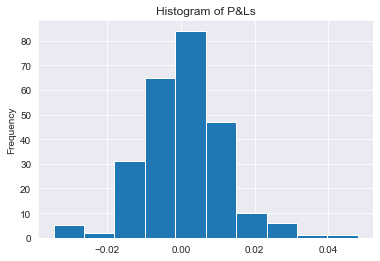

In [13]:
port_close['P&L'].plot(kind='hist', title="Histogram of P&Ls")

In [14]:
from scipy.stats import kurtosis, skew

In [15]:
print(f"Skew is {skew(returns)}\n")
print(f"Kurtosis is {kurtosis(returns)}")

Skew is 0.30275810677546766

Kurtosis is 1.6703628605029026


### Bootstrap VaR

In [16]:
#This function returns historical VaR at 95% confidence. We will use it to feed bootstrap function
def VaR_95(data):
    return np.percentile(data, 5, interpolation="lower")

In [17]:
#This function will generate random samples with replacement
def bootstrap(data, func):
    sample = np.random.choice(data, len(data))
    return func(sample)

In [18]:
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap(data, func)

    return bs_replicates


We take 10000 resampled VaR of our data with replacement, then the mean of that is our bootstrap VaR measure

In [20]:
#Take 10000 bootstrap replicates of portfolio returns
bootstrap_VaR = draw_bs_reps(returns, VaR_95, 10000)
print(f"The Bootstrap VaR measure is {np.mean(bootstrap_VaR)}")

The Bootstrap VaR measure is -0.016086695958983245


This measure is quite close to our simple historical VaR, but slightly lower (higher number, lower VaR)

Text(0, 0.5, 'PDF')

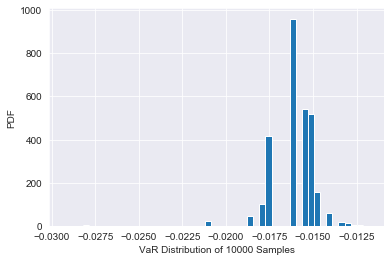

In [23]:
plt.hist(bootstrap_returns, bins=50, density=True)
plt.xlabel('VaR Distribution of 10000 Samples')
plt.ylabel('PDF')

### Confidence Intervals

One of the advantages of bootstrapping is that it allows us to get a fairly good measure of our VaR confidence intervals, which is better than just presenting one number as the VaR. 

In [22]:
conf_intervals = np.percentile(bootstrap_returns, [25, 97.5])
print(f"The 95% VaR Confidence Interval is {conf_intervals}")

The 95% VaR Confidence Interval is [-0.01627389 -0.01403084]


That's quite a tight interval, so we can be reasonably confident of our measure.

### Age-weighted Historical Simulation

Simple historical simulation suffers from an obvious problem: it weights all days as being equally important, no matter how recent or far back. If you own shares in stocks that are highly seasonal, this is a problem. Another problem are "ghost effects", when you get a cluster of volatility somewhere in your date range that has an outsize effect on the VaR calculation. One way to address these problems is to weight recent days more heavily than those further in the past. We use a decay factor $\lambda$, which is between 0 and 1. A lambda close to one indicates slow decay (values far in the past will still have weight), and close to zero is fast decay. The sum of the weights is 1, and the formula for the weight on day _w(i)_ is $\frac{\lambda^{i-1}(1-\lambda)}{1-\lambda^{n}}$

To calculate VaR, we simply create an array of weights of the same length as our array of returns:

In [17]:
lam = 0.5 #we're picking this arbitrarily
n = len(returns)
wts = [(lam**(i-1) * (1-lam))/(1-lam**n) for i in range(1, n+1)]#want to start on day 1, not day 0

In [18]:
wts[:15] #We can see how they get smaller and smaller

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 3.0517578125e-05]

Now we sort the returns and look at the corresponding weights, we want the figure where the sum of the weights is .05 

In [19]:
weights_dict = {'Returns':returns, 'Weights':wts}
wts_returns = pd.DataFrame(weights_dict)

In [20]:
sort_wts = wts_returns.sort_values(by='Returns')

In [21]:
sort_wts['Cumulative'] = sort_wts.Weights.cumsum()

In [22]:
sort_wts

,Returns,Weights,Cumulative
112,-0.034637,9.629650e-35,9.629650e-35
119,-0.031164,7.523164e-37,9.704881e-35
113,-0.029270,4.814825e-35,1.451971e-34
227,-0.028455,2.318254e-69,1.451971e-34
207,-0.028211,2.430865e-63,1.451971e-34
...,...,...,...
222,0.026604,7.418412e-68,9.999990e-01
243,0.026682,3.537375e-74,9.999990e-01
123,0.031458,4.701977e-38,9.999990e-01
19,0.036243,9.536743e-07,1.000000e+00


In [23]:
#Find where cumulative (percentile) hits 0.05
sort_wts = sort_wts.reset_index().drop(columns=['index'])
sort_wts[sort_wts.Cumulative <= 0.05].Returns.idxmax()

37

In [31]:
sort_wts.loc[37:38]

,Returns,Weights,Cumulative
37,-0.009962,1.215433e-63,0.002076
38,-0.009574,5.000000e-01,0.502076


The reason for the big jump is because the return at index 39 is yesterday's return, so it has a large weight attached to it.

We can use simple linear interpolation to find the correct return values

In [32]:
xp = sort_wts.loc[37:38, 'Cumulative'].values
fp = sort_wts.loc[37:38, 'Returns'].values
VaR_weighted = np.interp(0.5, xp, fp) #numpy's standard linear interpolation

In [34]:
print(VaR_weighted)

-0.00957577113342102


We can see that the age-weighted VaR is less than standard HS, indicating that more recent returns weren't as bad. 

### Volatility-Weighted Historical Simulation

This method places more weight on recent changes in volatility. To implement this, we will change the returns by the following formula: $r'_{t,i}=(\frac{\sigma_{T,i}}{\sigma_{t,i}})r_{t,i}$, where $r'$ is the adjusted return of asset _i_ at time _t_, and $\sigma_{t,i}$ is the forecasted volatility at time _t_ taken at time _t-1_. $\sigma_{T,i}$ is the most recent forecasted volatility. So if volatility one month ago was only 2%, and today it's 10%, the model will weigh more recent returns more heavily. This makes intuitive sense, and in many ways does a better job than age-weighted VaR at capturing market conditions most likely to result in a loss we are trying to quantify. 

To implement this, we need to go back to our first dataframe and look at individual asset returns. Then, we'll use a GARCH(1,1) process to forecast volatility, adjust each return, and finally come up with a new P&L based on these adjusted returns.

In [14]:
from arch import arch_model

In [15]:
#need to make the numbers bigger to prevent convergence problems
port_close_100 = port_close[-100:].drop(columns='P&L') * 100 #only using 100 days for simplicity

In [16]:
port_close = port_close * 100

In [17]:
index = port_close.index
start_loc = 0
end_loc = np.where(index >= '2015-10-20')[0].min()

In [35]:
vols = pd.DataFrame(index=port_close_100.index)
for asset in port_close.drop(columns='P&L'):
    forecasts = {}
    am = arch_model(port_close[asset])
    for i in range(100):
        res = am.fit(first_obs=i, last_obs=i + end_loc, disp='off')
        temp = res.forecast(horizon=1).variance
        fcast = temp.iloc[i + end_loc - 1]
        forecasts[fcast.name] = fcast
    vols[asset+'_vol'] = forecasts.values()

In [36]:
#Need to clean up the cells and cast them as floats
vols2 = vols.applymap(lambda x: re.sub(r'[\(\),]', '', str(x)))

vols2 = vols2.astype('float')

In [37]:
vols2 = vols2 / 10000 #adjust them back down
vols2 = np.sqrt(vols2) #turn from variance to volatility
vols2

,AAPL_vol,GE_vol,GOOGL_vol,JNJ_vol
Date,,,,
2015-10-19,0.012839,0.010546,0.012329,0.008059
2015-10-20,0.014049,0.011077,0.027546,0.008061
2015-10-21,0.013124,0.009422,0.020051,0.007503
2015-10-22,0.013759,0.026324,0.018013,0.011611
2015-10-23,0.017869,0.009632,0.049171,0.010904
...,...,...,...,...
2016-03-07,0.018492,0.012745,0.018508,0.010205
2016-03-08,0.018088,0.012594,0.016597,0.010165
2016-03-09,0.017680,0.011935,0.016714,0.010033


Now for each stock, we need to take the forecasted volatility from our last day, on 3/11/2016, and divide by the volatility on each given day, then multiply that by the return for that day.

In [38]:
#Save these values for FHS
vol_tomorrow = vols2.iloc[-1].copy().values 
vols_fhs = vols2.copy().values

In [39]:
vols2['AAPL_vol'] = vols2['AAPL_vol'].apply(lambda x: vols2.AAPL_vol[-1] / x)
vols2['GE_vol'] = vols2['GE_vol'].apply(lambda x: vols2.GE_vol[-1] / x)
vols2['GOOGL_vol'] = vols2['GOOGL_vol'].apply(lambda x: vols2.GOOGL_vol[-1] / x)
vols2['JNJ_vol'] = vols2['JNJ_vol'].apply(lambda x: vols2.JNJ_vol[-1] / x)

Finally, we multiply each individual return by it's corresponding volatility adjustment, then calculate the new VaR.

In [40]:
vol_adj_portfolio = pd.DataFrame(port_close_100.values / 100 * vols2.values, columns=port_close_100.columns,\
                                 index=port_close_100.index)

In [41]:
vol_adj_portfolio #These are the returns adjusted for volatility

,AAPL,GE,GOOGL,JNJ
Date,,,,
2015-10-19,0.008272,0.000389,0.008839,-0.003642
2015-10-20,0.022211,-0.007782,-0.016935,-0.004261
2015-10-21,-0.000114,0.003072,-0.009843,0.000525
2015-10-22,0.018999,0.011438,0.012632,0.016109
2015-10-23,0.029644,-0.002924,0.018663,0.006908
...,...,...,...,...
2016-03-07,-0.010228,-0.005211,-0.021096,0.002122
2016-03-08,-0.007791,-0.007174,0.001010,-0.004606
2016-03-09,0.000861,-0.000332,0.016304,0.005592


In [42]:
#Convert volatility-adjusted returns back into P/L
weights = [0.2, 0.3, 0.1, 0.4] #same weights as before
vol_adjusted_returns = (weights * vol_adj_portfolio.values).sum(axis=1)

In [43]:
VaR_Vol_Weighted = np.percentile(vol_adjusted_returns, 5, interpolation="lower") 
print(f'The volitility weighted historical VaR is {VaR_Vol_Weighted}')

The volitility weighted historical VaR is -0.013894333058865


This VaR is hard to compare with the other because we only looked at the last 100 days, but we can see it's not very far off.

### Filtered Historical Simulation

One way to think about this method is a combination of of volatility-weighted and bootstrap VaR. We are going to make a volatility adjustment (though not quite the same way), then generate bootstrap samples for each set of returns.

I'm going to use the same volatilities as the previous model, using the last 100 days as our sample period from which we will bootstrap. For this method, we're not doing the same volatility adjustment, but rather dividing each return from the last 100 days by its respective forecasted volatility.

In [44]:
standardized_returns = pd.DataFrame(port_close_100.values / 100 / vols_fhs, columns=port_close_100.columns,\
                                 index=port_close_100.index)

In [45]:
standardized_returns

,AAPL,GE,GOOGL,JNJ
Date,,,,
2015-10-19,0.483999,0.032719,0.540081,-0.378920
2015-10-20,1.299645,-0.653973,-1.034688,-0.443328
2015-10-21,-0.006697,0.258146,-0.601420,0.054630
2015-10-22,1.111699,0.961221,0.771822,1.676116
2015-10-23,1.734575,-0.245694,1.140264,0.718708
...,...,...,...,...
2016-03-07,-0.598484,-0.437891,-1.288945,0.220832
2016-03-08,-0.455879,-0.602931,0.061706,-0.479257
2016-03-09,0.050385,-0.027874,0.996141,0.581797


In [46]:
nrows = standardized_returns.shape[0]
def bootstrap_fhs(data):
    '''Draws a random vector of returns and multiplies it 
       by updated volatility forecast'''
    idx = np.random.choice(nrows, 1)
    sample = data.iloc[idx, :].values
    return sample * vol_tomorrow

def draw_bs_reps_fhs(data, size):
    """Draw bootstrap replicates"""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty([size, 4])

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_fhs(data)

    return bs_replicates

Unlike in regular bootstrap HS, we're going to run a bootstrap on each asset separately, then compute a simulated P&L at the end. This way it preserves correlations between them.

In [47]:
bootstrap_std_returns = draw_bs_reps_fhs(standardized_returns, 10000)
    

In [48]:
simulated_PnL = (weights * bootstrap_std_returns).sum(axis=1)

In [49]:
VaR_FHS = np.percentile(simulated_PnL, 5, interpolation="lower") 
print(f'The filtered historical simulated VaR is {VaR_FHS}')

The filtered historical simulated VaR is -0.013894333058864998
